<a href="https://colab.research.google.com/github/anitabudhiraja/DeepLearning/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.datasets import mnist
from keras.layers import Dense
from keras.optimizers import Adam
import random

In [3]:
#import 60000 images from mnist data set
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [4]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape[0])

(60000, 28, 28)
(10000, 28, 28)
60000


In [6]:
assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal .."
assert(X_test.shape[0] == y_test.shape[0]), "The number of images is not equal .."
assert(X_train.shape[1:] == (28, 28)), "The dimension of the images are not 28x28"
assert(X_test.shape[1:] == (28, 28)), "The dimension of the images are not 28x28"

we will show 5 random pictures of each digit.

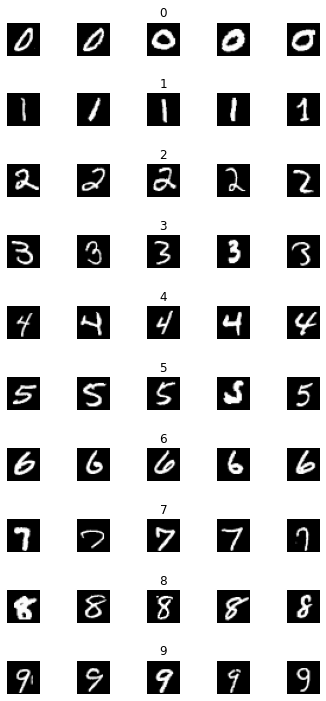

In [7]:
num_of_samples = []

cols = 5 #We will select 5 random images
num_of_classes = 10 #each digit total: 10

fig, axs = plt.subplots(nrows=num_of_classes, ncols=cols,
                       figsize=(5, 10))
fig.tight_layout()
for i in range(cols):
  for j in range(num_of_classes):
    x_selected = X_train[y_train == j]
    axs[j][i].imshow(x_selected[random.randint(0, len(x_selected -1)),
                                :, :],
                    cmap=plt.get_cmap('gray')) 
    axs[j][i].axis("off")
    if i==2:
      axs[j][i].set_title(str(j))
      num_of_samples.append(len(x_selected))

see each of the digits has how much images from code belo

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]

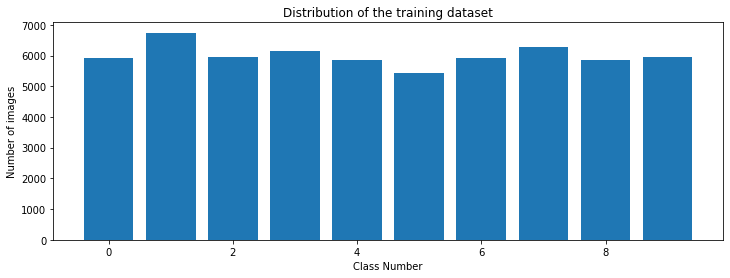

In [9]:
print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_of_classes), num_of_samples)
plt.title("Distribution of the training dataset")
plt.xlabel("Class Number")
plt.ylabel("Number of images")
[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


Then we apply to_categorical() function since we have multiclass results(0–9: 10 output)

In [12]:

from keras.utils.np_utils import to_categorical
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

Because of the matrix multipication we must change the shape of the array. (AxB * BxC = AxC) So we will shape the 28x28 array to 1x784.

In [13]:
#Each image has Intensity from 0 to 255
X_train = X_train/255 
X_test = X_test/255
#we must change the shape of the images to 1d array(28*28)
#for multipication 1*784
num_pixels = 784
X_train = X_train.reshape(X_train.shape[0],
                         num_pixels)
X_test = X_test.reshape(X_test.shape[0],
                         num_pixels)
print(X_train.shape)

(60000, 784)


In [14]:
def create_model():
  model = Sequential()
  model.add(Dense(10, input_dim = num_pixels, #num_pixels: 784
                  activation = 'relu'))
  model.add(Dense(30, activation='relu'))
  model.add(Dense(10, activation='relu'))
  model.add(Dense(num_of_classes, activation='softmax'))
  model.compile(Adam(lr=0.01), #lr: learning rate
                loss='categorical_crossentropy', #loss function
               metrics=['accuracy'])
  return model

In [15]:
model = create_model()
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                7850      
_________________________________________________________________
dense_1 (Dense)              (None, 30)                330       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                310       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                110       
Total params: 8,600
Trainable params: 8,600
Non-trainable params: 0
_________________________________________________________________
None


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [16]:
history = model.fit(X_train, y_train, validation_split=0.1, epochs=10, batch_size=200, 
                    verbose=1, shuffle=1)

Epoch 1/10
270/270 [==============================] - 14s 5ms/step - loss: 0.8783 - accuracy: 0.6960 - val_loss: 0.2697 - val_accuracy: 0.9182
Epoch 2/10
270/270 [==============================] - 1s 3ms/step - loss: 0.2994 - accuracy: 0.9092 - val_loss: 0.2318 - val_accuracy: 0.9302
Epoch 3/10
270/270 [==============================] - 1s 3ms/step - loss: 0.2615 - accuracy: 0.9199 - val_loss: 0.2102 - val_accuracy: 0.9342
Epoch 4/10
270/270 [==============================] - 1s 3ms/step - loss: 0.2439 - accuracy: 0.9283 - val_loss: 0.1967 - val_accuracy: 0.9410
Epoch 5/10
270/270 [==============================] - 1s 3ms/step - loss: 0.2259 - accuracy: 0.9308 - val_loss: 0.1985 - val_accuracy: 0.9378
Epoch 6/10
270/270 [==============================] - 1s 3ms/step - loss: 0.2158 - accuracy: 0.9346 - val_loss: 0.1916 - val_accuracy: 0.9405
Epoch 7/10
270/270 [==============================] - 1s 3ms/step - loss: 0.2106 - accuracy: 0.9361 - val_loss: 0.1970 - val_accuracy: 0.9422
Epoch

keep our training model in history so we can plot

Text(0.5, 0, 'epoch')

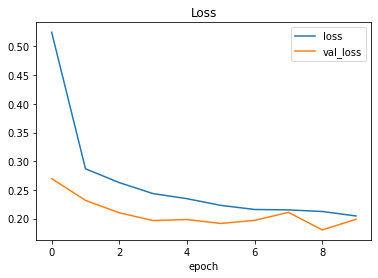

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('Loss')
plt.xlabel('epoch')

see accuracy


Text(0.5, 0, 'epoch')

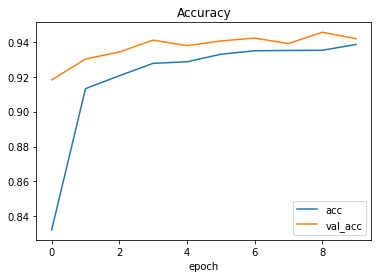

In [20]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['acc', 'val_acc'])
plt.title('Accuracy')
plt.xlabel('epoch')

test our model .First we will get an image from url. 

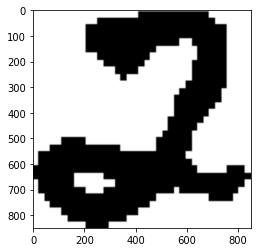

In [26]:
import requests
from PIL import Image

url = 'https://www.researchgate.net/profile/Jose_Sempere/publication/221258631/figure/fig1/AS:305526891139075@1449854695342/Handwritten-digit-9.png'
response = requests.get(url, stream = True)
img = Image.open(response.raw)

plt.imshow(img)

resize this image and greyscale it. Then we will transform this image to our specific input format(1*784).

[[  0   0   0   0   0   0   0   0   0   0   0   0   0 118 255 255 255 255
  255 255 255 255 222   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255   2   0   0   0   0]
 [  0   0   0   0   0   0   0 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255   0   0   0]
 [  0   0   0   0   0   0   0 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255   0   0   0]
 [  0   0   0   0   0   0   0 255 255 255 255 255 255 255 255 255 254 254
  254   0 236 255 255 255 255   0   0   0]
 [  0   0   0   0   0   0   0  33 255 255 255 255 255 255 255  33   0   0
    0   0   0 255 255 255 255   0   0   0]
 [  0   0   0   0   0   0   0   0  21 255 255 255 255 255  21   0   0   0
    0   0 215 255 255 255 255   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  63 255 255 137   0   0   0   0
    0   0 235 255 255 255 255   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 255   0   0   0   

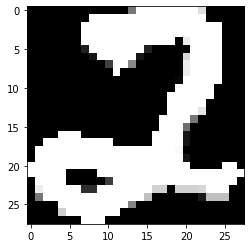

In [22]:
import cv2
img_array = np.asarray(img)
resized = cv2.resize(img_array, (28, 28 ))
gray_scale = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY) #(28, 28)
image = cv2.bitwise_not(gray_scale)
plt.imshow(image, cmap=plt.get_cmap('gray'))
print(image)

In [28]:
image = image / 255
image = image.reshape(1, 784)
prediction = model.predict(image)
print("predicted digit:", str(prediction))
#predicted digit: [2]

predicted digit: [[0.00130922 0.1947361  0.07066103 0.03188202 0.24437238 0.14790793
  0.00235058 0.24099772 0.00507664 0.06070638]]
